### Assignment 6.2.a: CIFAR10

In [ ]:
import sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**Import Data**

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Format Photos**

In [5]:
train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')

train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

**Initiating a Model**

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [7]:
opt = SGD(learning_rate=0.001, momentum=0.9)

In [8]:
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 120s 152ms/step - loss: 17648.5059 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
782/782 [==============================] - 121s 155ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
782/782 [==============================] - 140s 179ms/step - loss: 2.3026 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
782/782 [==============================] - 131s 167ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
782/782 [==============================] - 116s 148ms/step - loss: 2.3026 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000


**Saving the Model**

In [10]:
model.save('results/model-6-2-a')

INFO:tensorflow:Assets written to: results/model-6-2-a/assets


**Saving the Predictions**

In [11]:
pred = model.predict(x_test)

pred = pd.DataFrame(pred)
pred.to_csv('results/model-6-2-a/predictions.csv')

**Saving the Metrics**

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 2.3026 - accuracy: 0.1000


In [13]:
print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)

Test Accuracy:  0.10000000149011612
Test Loss:  2.302586078643799


In [14]:
lines = ['Test Accuracy:  0.10000000149011612', 'Test Loss:  2.302586078643799']

In [15]:
with open('results/model-6-2-a/metrics.txt', 'w') as f:
    f.write('\n'.join(lines))

**Saving the Validation Plots**

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
epochs = range(1, len(acc) + 1)

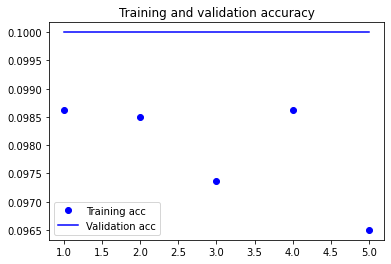

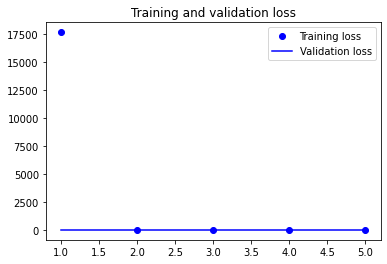

In [18]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [19]:
plt.savefig('results/model-6-2-a/validationplot.jpg')

<Figure size 432x288 with 0 Axes>

### Assignment 6.2.b: CIFAR10 with Dropout & Augmentation

**Initiating the Model**

In [20]:
modelB = Sequential()
modelB.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32, 32, 3)))
modelB.add(MaxPooling2D(pool_size=(2, 2)))
modelB.add(Flatten())
modelB.add(Dense(16, activation='relu'))
modelB.add(Dense(1, activation='sigmoid'))

In [21]:
modelB.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Image Augmentation**

In [22]:
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

In [24]:
validation_generator = train_datagen.flow(x_train, y_train, batch_size=32)

In [25]:
test_generator = test_datagen.flow(x_test, batch_size=1)

**Fitting the Model**

In [26]:
historyB = modelB.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 9s 85ms/step - loss: 1.9452 - accuracy: 0.8600 - val_loss: 0.3813 - val_accuracy: 0.8960
Epoch 2/10
100/100 [==============================] - 7s 71ms/step - loss: 0.3712 - accuracy: 0.8968 - val_loss: 0.3678 - val_accuracy: 0.8960
Epoch 3/10
100/100 [==============================] - 10s 102ms/step - loss: 0.3631 - accuracy: 0.8983 - val_loss: 0.3594 - val_accuracy: 0.9000
Epoch 4/10
100/100 [==============================] - 11s 106ms/step - loss: 0.3545 - accuracy: 0.8985 - val_loss: 0.3516 - val_accuracy: 0.9000
Epoch 5/10
100/100 [==============================] - 14s 139ms/step - loss: 0.3468 - accuracy: 0.9000 - val_loss: 0.3454 - val_accuracy: 0.9000
Epoch 6/10
100/100 [==============================] - 8s 80ms/step - loss: 0.3427 - accuracy: 0.9000 - val_loss: 0.3382 - val_accuracy: 0.9000
Epoch 7/10
100/100 [==============================] - 7s 72ms/step - loss: 0.3402 - accuracy: 0.8998 - val_loss: 0.3399 - val_accuracy: 

**Saving the Model**

In [27]:
modelB.save('results/model-6-2-b')

INFO:tensorflow:Assets written to: results/model-6-2-b/assets


**Saving the Predictions**

In [28]:
predB = modelB.predict(validation_generator)

predB = pd.DataFrame(predB)
predB.to_csv('results/model-6-2-b/predictions.csv')

**Saving the Metrics**

In [31]:
test_lossB, test_accB = modelB.evaluate(validation_generator)

1563/1563 [==============================] - 43s 27ms/step - loss: 0.3345 - accuracy: 0.9000


In [32]:
print("Test Accuracy: ", test_accB)
print("Test Loss: ", test_lossB)

Test Accuracy:  0.9000139236450195
Test Loss:  0.3345222771167755


In [33]:
lines = ['Test Accuracy:  0.9000139236450195', 'Test Loss:  0.3345222771167755']

In [34]:
with open('results/model-6-2-b/metrics.txt', 'w') as f:
    f.write('\n'.join(lines))

**Saving the Validation Plots**

In [39]:
acc = historyB.history['accuracy']
val_acc = historyB.history['val_accuracy']

loss = historyB.history['loss']
val_loss = historyB.history['val_loss']

In [40]:
epochs = range(1, len(acc) + 1)

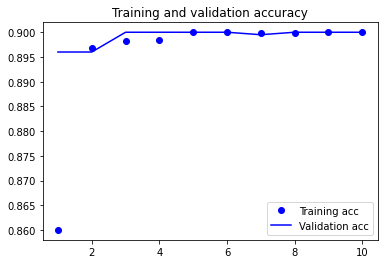

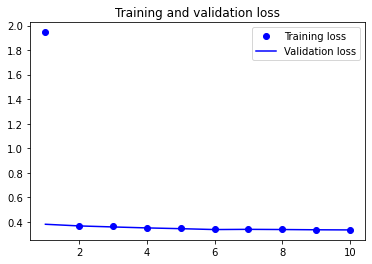

In [41]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [42]:
plt.savefig('results/model-6-2-b/validationplot.jpg')

<Figure size 432x288 with 0 Axes>